In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [5]:
basic=pd.read_table('title.basics.tsv.gz')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
basic.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
da=pd.read_table('title.ratings.tsv.gz',usecols=['tconst','averageRating','numVotes'],dtype={'averageRating':'float32','numVotes':'int32'})

In [8]:
da.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1694
1,tt0000002,6.0,210
2,tt0000003,6.5,1441
3,tt0000004,6.1,122
4,tt0000005,6.1,2240


In [9]:
data=da.merge(basic)

In [10]:
data.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.6,1694,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,6.0,210,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1441,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.1,122,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.1,2240,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [11]:
data=data.drop('primaryTitle',axis=1)

In [12]:
data['averageRating']=data['averageRating'].astype(float)

In [13]:
data['numVotes']=data['numVotes'].astype(float)
data['runtimeMinutes']=pd.to_numeric(data['runtimeMinutes'],errors='coerce')
data['startYear']=pd.to_numeric(data['startYear'],errors='coerce')
data.head()

,tconst,averageRating,numVotes,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.6,1694.0,short,Carmencita,0,1894.0,\N,1.0,"Documentary,Short"
1,tt0000002,6.0,210.0,short,Le clown et ses chiens,0,1892.0,\N,5.0,"Animation,Short"
2,tt0000003,6.5,1441.0,short,Pauvre Pierrot,0,1892.0,\N,4.0,"Animation,Comedy,Romance"
3,tt0000004,6.1,122.0,short,Un bon bock,0,1892.0,\N,12.0,"Animation,Short"
4,tt0000005,6.1,2240.0,short,Blacksmith Scene,0,1893.0,\N,1.0,"Comedy,Short"


In [14]:
df=data.dropna(subset=['genres', 'runtimeMinutes'])
df = df.replace('', np.nan)

In [15]:
df.head()

,tconst,averageRating,numVotes,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.6,1694.0,short,Carmencita,0,1894.0,\N,1.0,"Documentary,Short"
1,tt0000002,6.0,210.0,short,Le clown et ses chiens,0,1892.0,\N,5.0,"Animation,Short"
2,tt0000003,6.5,1441.0,short,Pauvre Pierrot,0,1892.0,\N,4.0,"Animation,Comedy,Romance"
3,tt0000004,6.1,122.0,short,Un bon bock,0,1892.0,\N,12.0,"Animation,Short"
4,tt0000005,6.1,2240.0,short,Blacksmith Scene,0,1893.0,\N,1.0,"Comedy,Short"


In [16]:
df['runtimeMinutes']=df['runtimeMinutes'].replace(["\\N"],'nan')

In [17]:
df=df.drop('endYear',axis=1)

In [18]:
df.isnull().sum()

tconst             0
averageRating      0
numVotes           0
titleType          0
originalTitle      0
isAdult            0
startYear         60
runtimeMinutes     0
genres             0
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
averageRating,832446.0,6.854481,1.355145,1.0,6.1,7.0,7.8,10.0
numVotes,832446.0,1286.966538,18775.182072,5.0,10.0,28.0,126.0,2369294.0
startYear,832386.0,1999.039443,21.640231,1874.0,1990.0,2007.0,2014.0,2021.0
runtimeMinutes,832446.0,55.401427,87.158263,0.0,23.0,45.0,86.0,51420.0


In [20]:
df['isAdult']=pd.to_numeric(df['isAdult'],errors='coerce')

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
averageRating,832446.0,6.854481,1.355145,1.0,6.1,7.0,7.8,10.0
numVotes,832446.0,1286.966538,18775.182072,5.0,10.0,28.0,126.0,2369294.0
isAdult,832446.0,0.017374,0.130661,0.0,0.0,0.0,0.0,1.0
startYear,832386.0,1999.039443,21.640231,1874.0,1990.0,2007.0,2014.0,2021.0
runtimeMinutes,832446.0,55.401427,87.158263,0.0,23.0,45.0,86.0,51420.0


In [22]:
#sns.pairplot(df.drop('isAdult', axis=1));

In [23]:
cols = [
    'originalTitle',
    'titleType',
    'averageRating',
    'numVotes',
    'startYear',
    'runtimeMinutes',
    'genres',
]

In [24]:
#converting string data to interger
le = LabelEncoder()
dataset = df[cols].dropna().copy()
dataset['titleType'] = le.fit_transform(dataset['titleType'])

In [25]:
dataset.head()

,originalTitle,titleType,averageRating,numVotes,startYear,runtimeMinutes,genres
0,Carmencita,1,5.6,1694.0,1894.0,1.0,"Documentary,Short"
1,Le clown et ses chiens,1,6.0,210.0,1892.0,5.0,"Animation,Short"
2,Pauvre Pierrot,1,6.5,1441.0,1892.0,4.0,"Animation,Comedy,Romance"
3,Un bon bock,1,6.1,122.0,1892.0,12.0,"Animation,Short"
4,Blacksmith Scene,1,6.1,2240.0,1893.0,1.0,"Comedy,Short"


In [26]:
#feature Importance 

In [27]:
def imp_df(column_names, importances):
    data = {
        'Feature': column_names,
        'Importance': importances,
    }
    df = pd.DataFrame(data) \
        .set_index('Feature') \
        .sort_values('Importance', ascending=False)
    
    return df

In [28]:
#r2 score
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

In [29]:
def drop_col_feat_imp(model, X_train, y_train, random_state=42):
    model_clone = clone(model)
    model_clone.random_state = random_state
    
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    
    importances = []
    
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis=1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis=1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    return imp_df(X_train.columns, importances)

In [30]:
X = dataset.drop(['averageRating', 'originalTitle', 'genres'], axis=1)
y = dataset['averageRating']

In [31]:
# feature importances
#from rfpimp import permutation_importances
from sklearn.base import clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# clustering 1d array
from scipy.signal import argrelextrema
from sklearn.neighbors import KernelDensity


In [32]:
#dividing data into training and  test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [33]:
#Model Training

In [34]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [35]:
rf.score(X_train, y_train)

0.6842930169036165

In [36]:
#Features importances by random forests

In [37]:
imp_df(X.columns, rf.feature_importances_)

,Importance
Feature,
runtimeMinutes,0.336972
numVotes,0.328651
startYear,0.254006
titleType,0.080371


In [38]:
#Makeing feature importances comparisons by deleting columns one by one

In [39]:
drop_col_feat_imp(rf, X_train, y_train)

,Importance
Feature,
numVotes,0.405367
runtimeMinutes,0.313632
startYear,0.307715
titleType,0.094186


In [40]:
#Scoring

In [42]:
dataset['score'] = (
    0.4821 * dataset['numVotes'] + 0.3502 * dataset['runtimeMinutes'] + 
    0.3710 * dataset['startYear'] + 0.0541 * dataset['titleType']
)
dataset = dataset.reset_index(drop=True)

In [43]:
dataset.sort_values(by='score', ascending=False).head(20)

,originalTitle,titleType,averageRating,numVotes,startYear,runtimeMinutes,genres,score
77850,The Shawshank Redemption,0,9.3,2369294.0,1994.0,142.0,Drama,1.143026e+06
208912,The Dark Knight,0,9.0,2332286.0,2008.0,152.0,"Action,Crime,Drama",1.125193e+06
444986,Inception,0,8.8,2092436.0,2010.0,148.0,"Action,Adventure,Sci-Fi",1.009561e+06
92484,Fight Club,0,8.8,1875216.0,1999.0,139.0,Drama,9.048319e+05
77643,Pulp Fiction,0,8.9,1846162.0,1994.0,154.0,"Crime,Drama",8.908284e+05
76816,Forrest Gump,0,8.8,1831906.0,1994.0,142.0,"Drama,Romance",8.839514e+05
336539,Game of Thrones,5,9.3,1788985.0,2011.0,57.0,"Action,Adventure,Drama",8.632360e+05
90661,The Matrix,0,8.7,1694977.0,1999.0,136.0,"Action,Sci-Fi",8.179377e+05
85050,The Lord of the Rings: The Fellowship of the Ring,0,8.8,1678782.0,2001.0,178.0,"Action,Adventure,Drama",8.101455e+05
104729,The Lord of the Rings: The Return of the King,0,8.9,1659011.0,2003.0,201.0,"Action,Adventure,Drama",8.006227e+05


In [44]:
dataset['score'].describe().T

count    8.323860e+05
mean     1.381640e+03
std      9.053179e+03
min      7.062308e+02
25%      7.613863e+02
50%      7.783188e+02
75%      8.267690e+02
max      1.143026e+06
Name: score, dtype: float64

In [45]:
#clusturing the data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


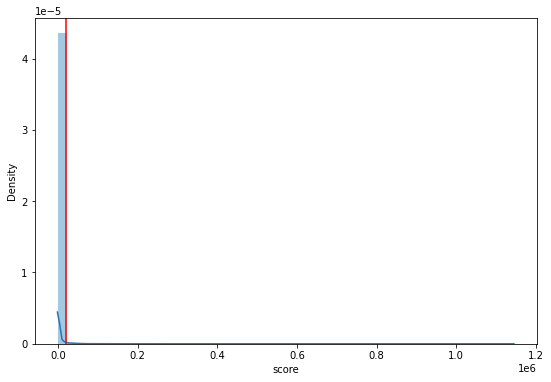

In [46]:
plt.figure(figsize=(9, 6))
sns.distplot(dataset['score'])
plt.axvline(20000, color='r');

In [47]:
vals = dataset['score'].values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(vals)

s = np.linspace(650, 20000)
e = kde.score_samples(s.reshape(-1,1))

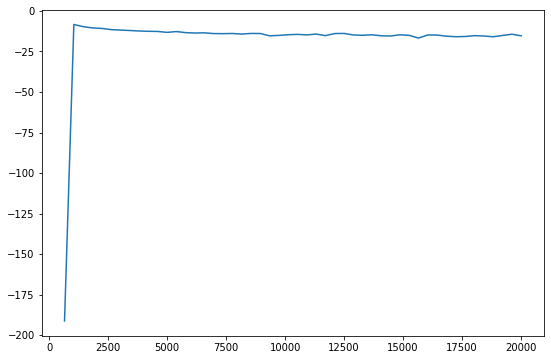

In [48]:
plt.figure(figsize=(9, 6))
plt.plot(s, e);

#Find min-max points of clusters
#Concat min points (s[mi]) and max points (s[ma])
#Sort points
#And assign clusters

In [49]:
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]

In [50]:
points = np.concatenate((s[mi], s[ma]), axis=0)
buckets = []

for point in points:
    buckets.append(point)

In [51]:
buckets = np.array(buckets)
buckets.sort()

In [52]:
dataset['cluster'] = buckets.searchsorted(dataset.score)

In [53]:
dataset.groupby('cluster').size()

cluster
0     746697
1      73476
2        735
3       1099
4        440
5        798
6        351
7        299
8        255
9        481
10       645
11       193
12       178
13       170
14       295
15       235
16       114
17       221
18       102
19       186
20        97
21       295
22       158
23       144
24       131
25      4591
dtype: int64

In [55]:
#Recommendation
#Tf-idf vectorizer for finding similarity of genres
#Linear kernel creates an NxN matrix with similarities between movies

In [57]:
# text processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [58]:
tfidf_vectorizer = TfidfVectorizer()
matrix = tfidf_vectorizer.fit_transform(dataset['genres'])

In [67]:
#Recommender Function
def get_recommendations(movie_index):
    print(dataset.iloc[movie_index])
    
    kernel = linear_kernel(matrix[movie_index], matrix)
    sim_scores = list(enumerate(kernel[0]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    indexes = [i[0] for i in sim_scores if i[0] != movie_index and i[1] > .5]
    
    cond1 = (dataset.index.isin(indexes))
    cond2 = (dataset.cluster == dataset.iloc[movie_index]['cluster'])
    cond3 = (dataset.titleType == dataset.iloc[movie_index]['titleType'])
    
    selected = dataset.loc[cond1 & cond2 & cond3] \
        .sort_values(by='score', ascending=False).head(20)
    display(selected)

In [68]:
get_recommendations(74808)

originalTitle          Indecent Behavior
titleType                              0
averageRating                        3.8
numVotes                             437
startYear                           1993
runtimeMinutes                        93
genres            Drama,Mystery,Thriller
score                            982.649
cluster                                0
Name: 74808, dtype: object


,originalTitle,titleType,averageRating,numVotes,startYear,runtimeMinutes,genres,score,cluster
492707,Caroline and Jackie,0,6.5,557.0,2012.0,85.0,"Drama,Mystery",1044.7487,0
333363,Okkadunnadu,0,7.4,536.0,2007.0,119.0,"Action,Thriller",1044.6764,0
34053,The Mind Benders,0,6.4,577.0,1963.0,109.0,"Drama,Thriller",1044.6165,0
74786,I Love a Man in Uniform,0,6.8,561.0,1993.0,99.0,"Drama,Thriller",1044.5309,0
534729,Lost Place,0,4.4,544.0,2013.0,101.0,"Horror,Mystery,Thriller",1044.4556,0
523174,I Against I,0,5.0,557.0,2012.0,84.0,"Crime,Thriller",1044.3985,0
662516,My Guardian Angel,0,4.7,542.0,2016.0,100.0,Thriller,1044.2542,0
500569,Poslednyaya skazka Rity,0,6.9,545.0,2012.0,100.0,"Drama,Fantasy,Mystery",1044.2165,0
300233,Cover,0,5.5,550.0,2007.0,98.0,"Drama,Thriller",1044.0716,0
381659,Ulvenatten,0,5.6,555.0,2008.0,90.0,"Action,Drama,Thriller",1044.0515,0


In [69]:
get_recommendations(73058)

originalTitle     Branford Marsalis: The Music Tells You
titleType                                              0
averageRating                                        7.1
numVotes                                               8
startYear                                           1992
runtimeMinutes                                        60
genres                       Biography,Documentary,Music
score                                            763.901
cluster                                                0
Name: 73058, dtype: object


,originalTitle,titleType,averageRating,numVotes,startYear,runtimeMinutes,genres,score,cluster
595949,Queen Mimi,0,7.3,562.0,2015.0,75.0,"Biography,Comedy,Documentary",1044.7702,0
801975,Paraíso Perdido,0,7.0,533.0,2018.0,110.0,"Drama,Music",1044.1593,0
627102,Citizen Jane: Battle for the City,0,6.9,547.0,2016.0,92.0,"Biography,Documentary,History",1043.8631,0
659253,What She Said: The Art of Pauline Kael,0,6.8,541.0,2018.0,98.0,"Biography,Documentary",1043.8137,0
456204,Vito,0,7.7,550.0,2011.0,93.0,"Biography,Documentary,History",1043.8046,0
533158,Little White Lie,0,7.2,568.0,2014.0,65.0,"Biography,Documentary,Drama",1043.7898,0
61427,Richy Guitar,0,6.1,572.0,1985.0,90.0,"Comedy,Music",1043.7142,0
68795,Docteur Petiot,0,7.1,557.0,1990.0,102.0,"Biography,Crime,Drama",1042.5401,0
803704,Ana e Vitória,0,6.5,526.0,2018.0,115.0,"Biography,Comedy,Music",1042.5356,0
90705,PNYC: Portishead - Roseland New York,0,8.9,558.0,1997.0,93.0,"Documentary,Music",1042.4674,0
